# 합성곱 신경망을 사용한 이미지 분류
#### 핵심 키워드: Conv2D, MaxPooling2D, plot_model

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

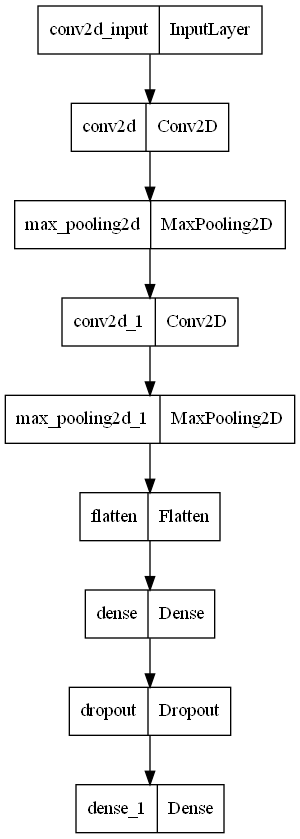

In [7]:
keras.utils.plot_model(model)

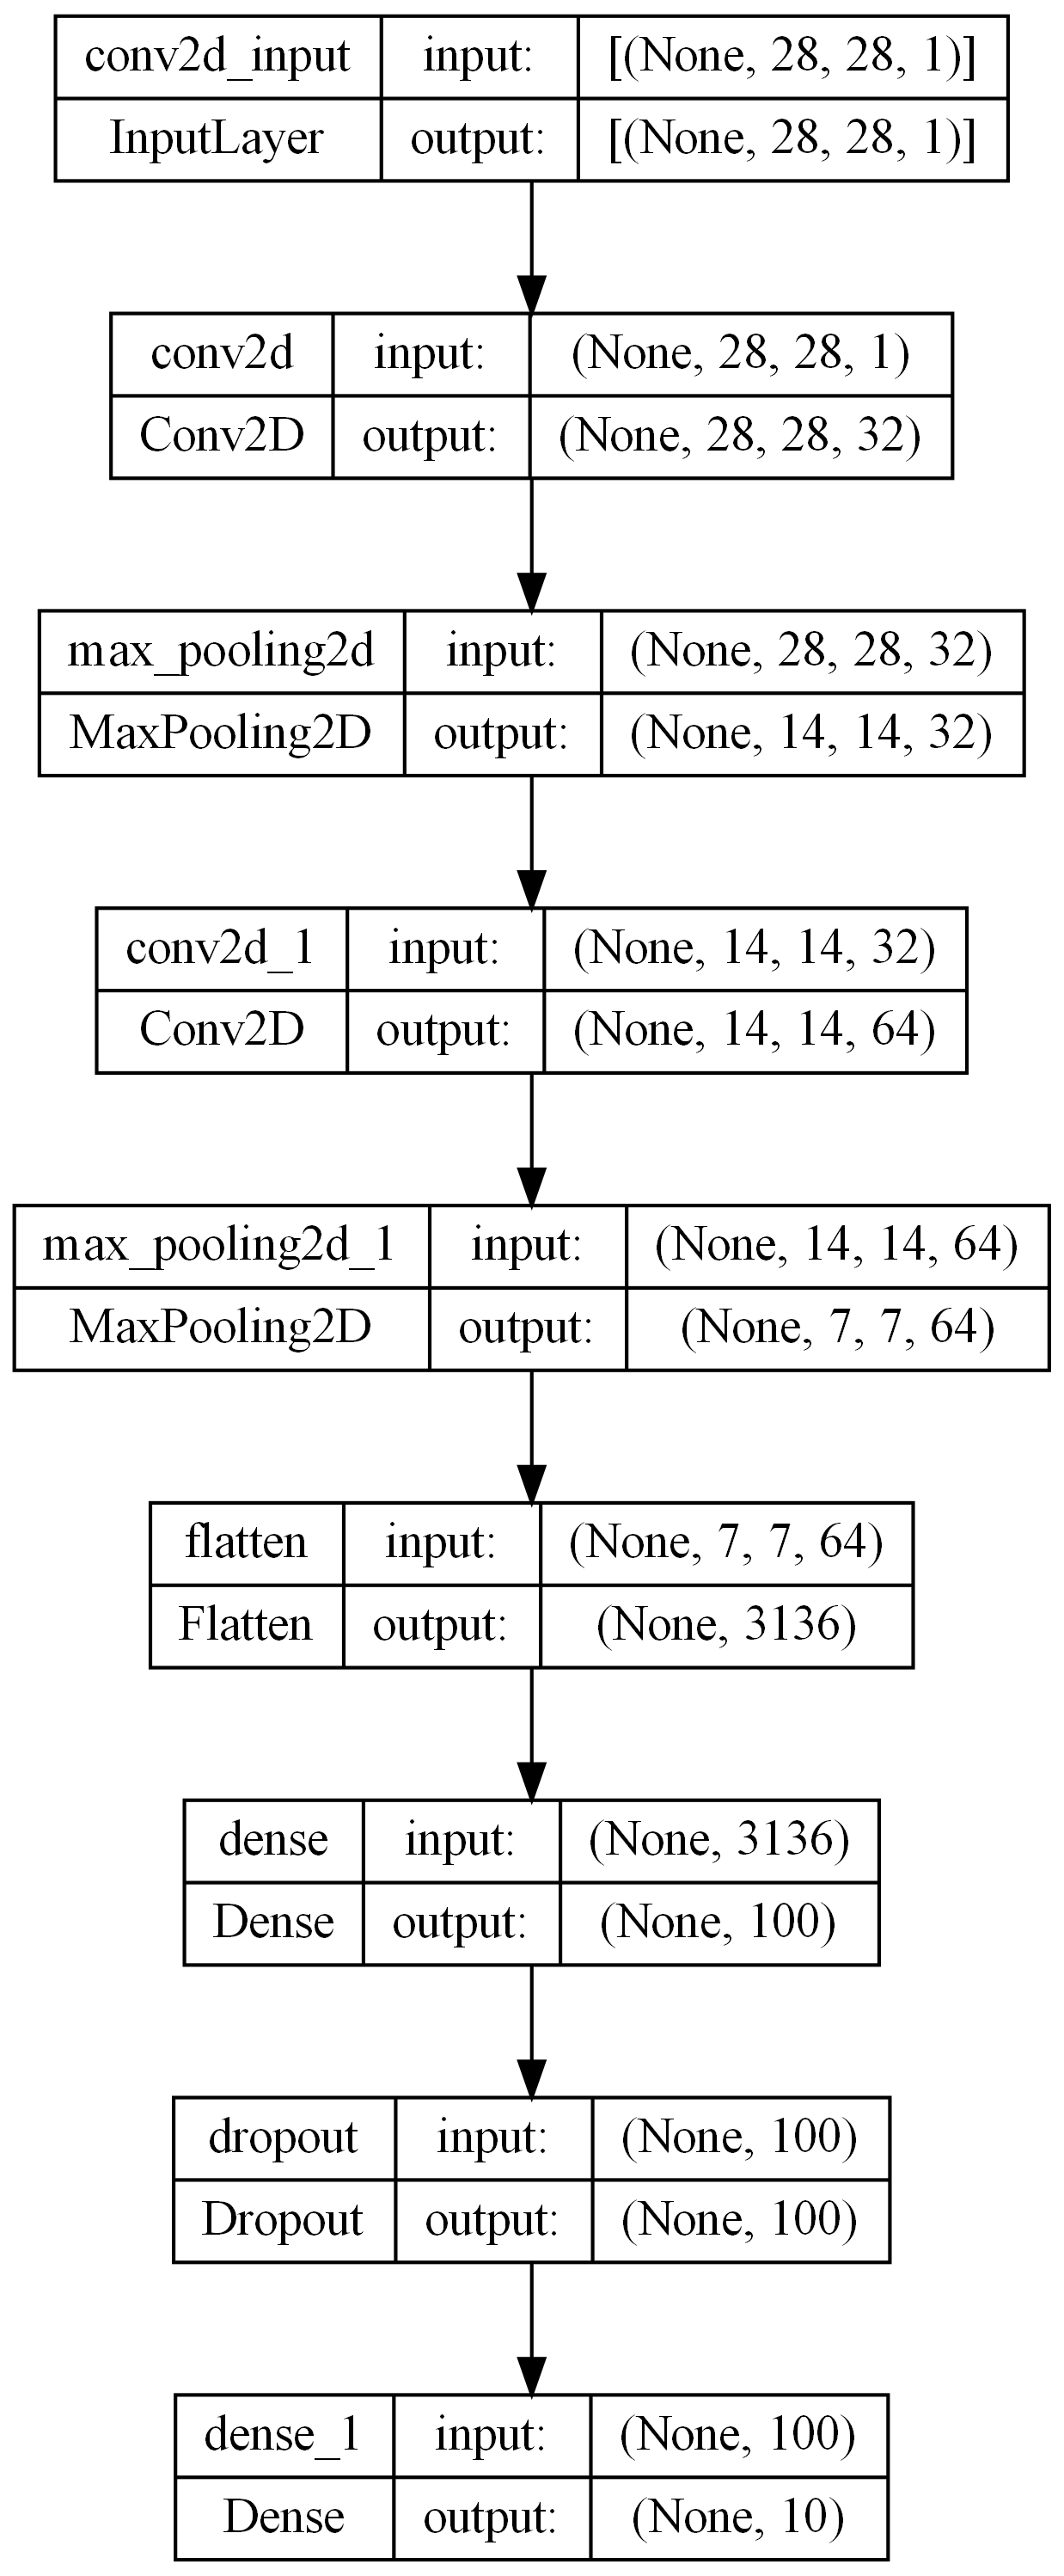

In [8]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5318 - accuracy: 0.8072 - val_loss: 0.3293 - val_accuracy: 0.8809
Epoch 2/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.3537 - accuracy: 0.8729 - val_loss: 0.2869 - val_accuracy: 0.8938
Epoch 3/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3057 - accuracy: 0.8901 - val_loss: 0.2580 - val_accuracy: 0.9053
Epoch 4/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2721 - accuracy: 0.9010 - val_loss: 0.2491 - val_accuracy: 0.9075
Epoch 5/20
1500/1500 [==============================] - 23s 16ms/step - loss: 0.2503 - accuracy: 0.9080 - val_loss: 0.2382 - val_accuracy: 0.9129
Epoch 6/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2298 - accuracy: 0.9154 - val_loss: 0.2344 - val_accuracy: 0.9150
Epoch 7/20
1500/1500 [==============================] - 14s 10ms/step - loss: 0.2136 - accuracy: 0.9213 - val_loss: 0.2478 -

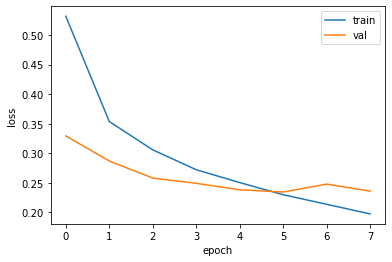

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 10ms/step - loss: 0.2344 - accuracy: 0.9150


[0.23438535630702972, 0.9150000214576721]

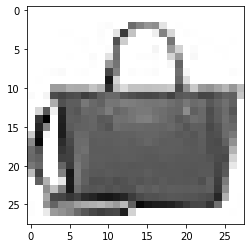

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 99ms/step
[[5.8437670e-14 5.9455141e-18 2.9132621e-14 1.3552340e-15 1.7880716e-13
  3.1806256e-11 3.8524091e-13 3.4413516e-12 1.0000000e+00 1.6579279e-13]]


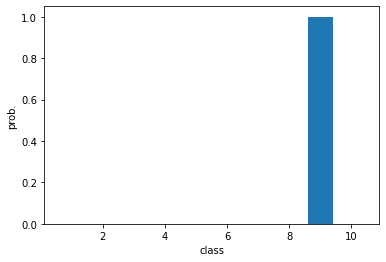

In [14]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [16]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [18]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2488 - accuracy: 0.9117


[0.24875468015670776, 0.9117000102996826]